### Import necessary libraries

In [40]:
# Import necessary libraries

import numpy as np
import pandas as pd
import nltk
import random
import os
from textblob import TextBlob
import matplotlib.pyplot as plt


In [41]:
# Read file
e_data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
# Printing e_data
print(e_data.shape)

(23486, 11)


In [4]:

e_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
# null value elimination 
e_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
e_data.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [7]:


column_data_types = e_data.dtypes
column_data_types

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [8]:


null_counts_per_column = e_data.isnull().sum()
# count of null values in data
null_counts_per_column

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:

e_data.drop(e_data.columns[0], inplace=True, axis=1)
# eliminating unnneccessary first column in data


null_counts_per_column = e_data.isnull().sum()
null_counts_per_column

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [10]:
# Eliminating Values
for x in ["Title", "Division Name", "Department Name", "Class Name", "Review Text"]:
    e_data = e_data[e_data[x].notnull()]  

In [11]:
e_data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [12]:
e_data.shape

(19662, 10)

In [13]:
e_data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [14]:
e_data.sample(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
6277,1110,29,Gorgeous,I absolutely love this dress. the color is bea...,5,1,0,General,Dresses,Dresses
5025,977,50,Nice jacket,This jacket is a flattering although somewhat ...,4,1,0,General Petite,Jackets,Jackets
10951,1083,54,Gorgeous dress!,This is one of the most special dresses i have...,5,1,0,General,Dresses,Dresses


In [15]:
duplicates = e_data.duplicated()
print(duplicates)

2        False
3        False
4        False
5        False
6        False
         ...  
23481    False
23482    False
23483    False
23484    False
23485    False
Length: 19662, dtype: bool


In [16]:
data_no_duplicates = e_data.drop_duplicates()
print(data_no_duplicates)

       Clothing ID  Age                                              Title  \
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
5             1080   49                            Not for the very petite   
6              858   39                               Cagrcoal shimmer fun   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Ratin

In [17]:

summary_statistics = e_data.describe().T.drop('count', axis=1)
summary_statistics

,mean,std,min,25%,50%,75%,max
Clothing ID,921.297274,200.227528,1.0,861.0,936.0,1078.0,1205.0
Age,43.260808,12.258122,18.0,34.0,41.0,52.0,99.0
Rating,4.183145,1.112224,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818177,0.385708,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.652477,5.834285,0.0,0.0,1.0,3.0,122.0


In [18]:
e_data['Clothing ID'].unique()

array([1077, 1049,  847, ...,  721,  262,  522])

In [19]:
e_data['Clothing ID'].value_counts()

1078    871
862     658
1094    651
1081    487
829     452
       ... 
201       1
1200      1
525       1
1127      1
522       1
Name: Clothing ID, Length: 1095, dtype: int64

In [20]:

popular_products = pd.DataFrame(e_data.groupby('Clothing ID')['Rating'].count())


most_popular = popular_products.sort_values('Rating', ascending=False)


top_10_popular_products = most_popular.head(10)

# sample evaluation for data changes
top_10_popular_products

,Rating
Clothing ID,
1078,871
862,658
1094,651
1081,487
829,452
872,450
1110,419
868,370
895,336


<AxesSubplot:xlabel='Clothing ID'>

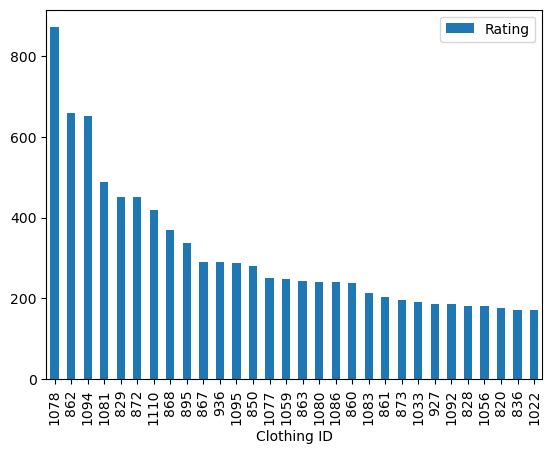

In [21]:
most_popular.head(30).plot(kind = "bar")

In [22]:
least_popular = popular_products.sort_values('Rating', ascending=True)

<AxesSubplot:xlabel='Clothing ID'>

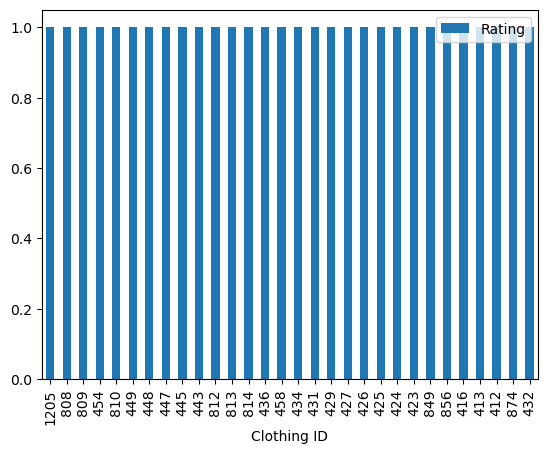

In [23]:
least_popular.head(30).plot(kind = "bar")

In [24]:
e_data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [25]:
e_data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [26]:
# Assumption for Review Text Column

# Polarity and Subjectivity of Data
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    return pd.Series([polarity, subjectivity])

In [27]:
# Setiments in Review Text
e_data[['Polarity', 'Subjectivity']] = e_data['Review Text'].apply(get_sentiment)

In [28]:
# Printing of Polarity and Subjectivity
print(e_data[['Review Text', 'Polarity', 'Subjectivity']])

                                             Review Text  Polarity  \
2      I had such high hopes for this dress and reall...  0.073675   
3      I love, love, love this jumpsuit. it's fun, fl...  0.550000   
4      This shirt is very flattering to all due to th...  0.512891   
5      I love tracy reese dresses, but this one is no...  0.178750   
6      I aded this in my basket at hte last mintue to...  0.133750   
...                                                  ...       ...   
23481  I was very happy to snag this dress at such a ...  0.552667   
23482  It reminds me of maternity clothes. soft, stre...  0.091667   
23483  This fit well, but the top was very see throug...  0.414286   
23484  I bought this dress for a wedding i have this ...  0.322222   
23485  This dress in a lovely platinum is feminine an...  0.413889   

       Subjectivity  
2          0.356294  
3          0.625000  
4          0.568750  
5          0.533125  
6          0.607778  
...             ...  
23481

In [29]:
e_data.head()


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Subjectivity
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.178750,0.533125
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.133750,0.607778


In [30]:
def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [31]:
e_data['Sentiment Label'] = e_data['Polarity'].apply(get_sentiment_label)
sentiment_counts = e_data['Sentiment Label'].value_counts()
print(sentiment_counts)

Positive    18443
Negative     1141
Neutral        78
Name: Sentiment Label, dtype: int64


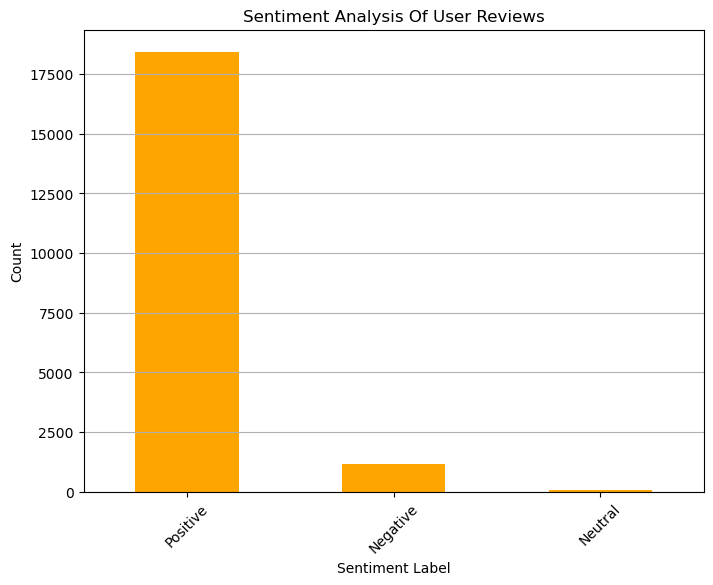

In [32]:
# Display of Sentimental Model
plt.figure(figsize=(8, 6)) 
sentiment_counts.plot(kind='bar', color='orange')  
plt.title('Sentiment Analysis Of User Reviews')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.grid(axis='y')  
plt.xticks(rotation=45)  
plt.show()

In [33]:
e_data['Sentiment Label'] = e_data['Subjectivity'].apply(get_sentiment_label)

In [34]:
sentiment_counts = e_data['Sentiment Label'].value_counts()
print(sentiment_counts)

Positive    19623
Neutral        39
Name: Sentiment Label, dtype: int64


In [35]:

file_path = 'cleaned_data.csv'

# Saving the Data Cleaned
e_data.to_csv(file_path, index=False)

In [36]:
sp_data = pd.read_csv("cleaned_data.csv")

In [37]:
sp_data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Subjectivity,Sentiment Label
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,Positive
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,Positive
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,Positive
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.178750,0.533125,Positive
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.133750,0.607778,Positive


In [38]:
sp_data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Polarity                   0
Subjectivity               0
Sentiment Label            0
dtype: int64

In [39]:
sp_data.nunique()

Clothing ID                 1095
Age                           77
Title                      13983
Review Text                19656
Rating                         5
Recommended IND                2
Positive Feedback Count       79
Division Name                  3
Department Name                6
Class Name                    20
Polarity                   11725
Subjectivity               10567
Sentiment Label                2
dtype: int64